In [224]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,Normalizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [225]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [227]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [228]:
data['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [229]:
data.groupby(['age','sex'])['target'].agg([np.sum])

sum
age sex     
29  1      1
34  0      1
    1      1
35  0      1
    1      1
...      ...
70  1      1
71  0      3
74  0      1
76  0      1
77  1      0

[73 rows x 1 columns]

In [230]:
unique_age = X['age'].unique()

In [231]:
unique_age.shape

(41,)

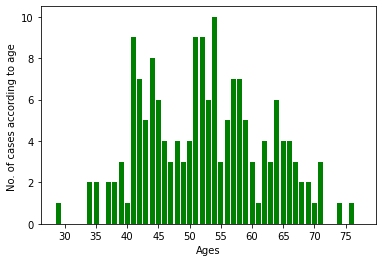

In [232]:
y_val=[]
for i in unique_age:
    y_plot = data.loc[data['age']==i,'target']
    y_val.append(y_plot.sum())
    
plt.figure()
plt.xticks(np.arange(0,80,5))
plt.xlabel('Ages')
plt.ylabel('No. of cases according to age ')
plt.bar(unique_age,y_val,color='g')
plt.show()

In [233]:
X = data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = data['target']

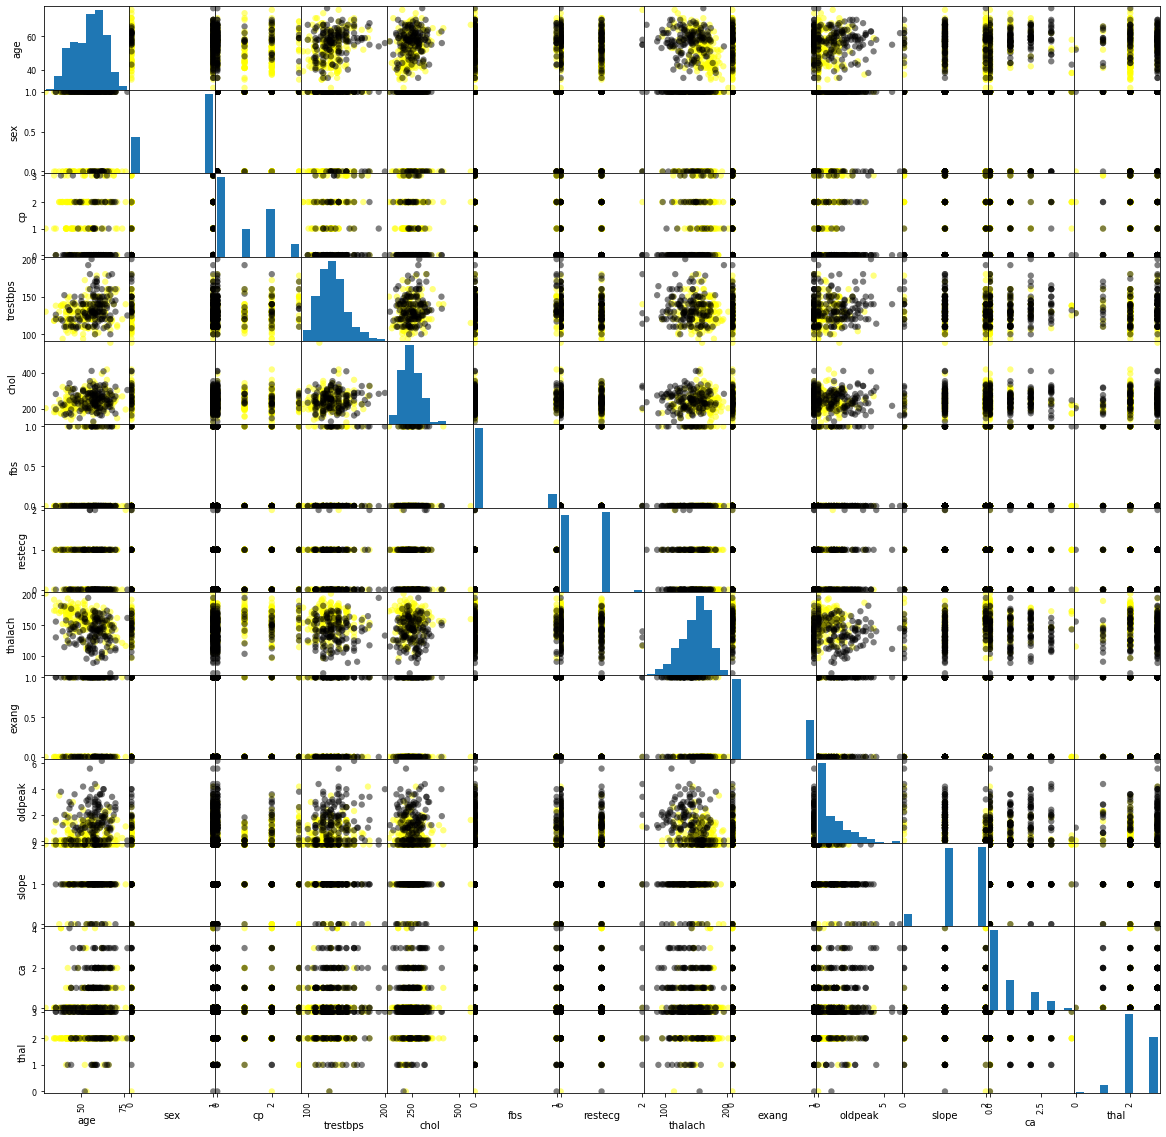

In [234]:
cmap_new = cm.get_cmap('gnuplot')
scatter_plot = pd.plotting.scatter_matrix(X,c=y,marker = 'o', s=40, figsize=(20,20), cmap=cmap_new)

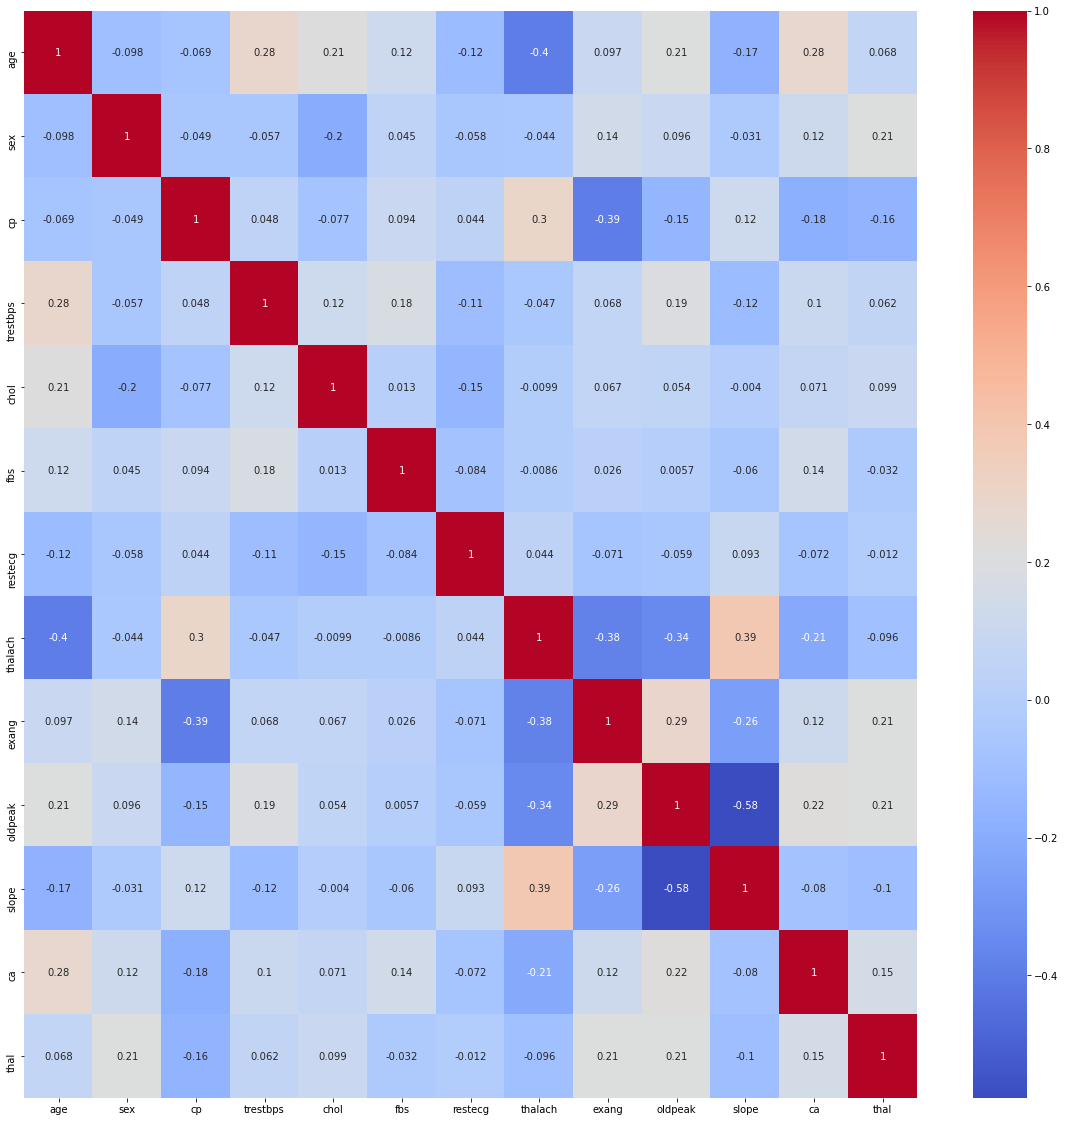

In [235]:
fig = plt.figure(1,figsize=(20,20))
sns.heatmap(X.corr(),cmap='coolwarm',annot=True)
plt.show()

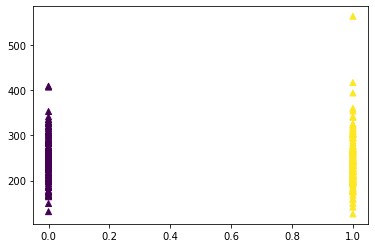

In [236]:
plt.figure()
plt.scatter(y,X['chol'],marker="^",c=y)
plt.show()

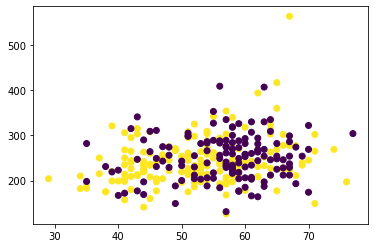

In [237]:
plt.figure()
plt.scatter(X['age'],X['chol'],marker='o',c=y)
plt.show()

Now we will use the KNN Classifier to find the output.

Since our data has loads of categorical data and various ranging data , so we can use the normalizer to get the values between 0 and 1.

Lets fix the categorical data first.

In [238]:
X['sex'] = X['sex'].astype('category')

<ipython-input-238-eb21b5e15eaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].astype('category')


In [239]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    int64   
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    int64   
 6   restecg   303 non-null    int64   
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    int64   
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    int64   
 11  ca        303 non-null    int64   
 12  thal      303 non-null    int64   
dtypes: category(1), float64(1), int64(11)
memory usage: 28.9 KB


In [240]:
norm = Normalizer()
SEED=42

In [241]:
X_norm = norm.fit_transform(X)

In [242]:
X_train,X_test,y_train,y_test = train_test_split(X_norm,y,test_size=0.2,random_state=SEED)

In [243]:
knn = KNeighborsClassifier()

In [244]:
params = np.arange(1,51,1)

In [245]:
gridsearch = GridSearchCV(knn,param_grid={'n_neighbors':params},cv=5)

In [246]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [247]:
gridsearch.score(X_test,y_test)

0.7868852459016393

In [248]:
gridsearch.best_params_

{'n_neighbors': 30}

In [249]:
y_pred = gridsearch.predict(X_test)

In [250]:
print('The accuracy we get from using KNN is: {}'.format(accuracy_score(y_test,y_pred)*100))

The accuracy we get from using KNN is: 78.68852459016394
